In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [29]:
fullData = pd.read_csv('data/churn_train.csv')
# Just seeing what the data looks like
fullData.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [32]:
# converting to datetime and adding churn indicators
fullData['last_trip_date'] = pd.to_datetime(fullData['last_trip_date'])
fullData['signup_date'] = pd.to_datetime(fullData['signup_date'])
condition = fullData['last_trip_date'] < '2014-06-01'
fullData['churn'] = 1
fullData.ix[~condition, 'churn'] = 0

In [7]:
# Churn Percentage and seeing the earliest and latest signup date
print float(sum(fullData['churn']))/float(len(fullData)), fullData['signup_date'].min(), fullData['signup_date'].max()

0.6242 2014-01-01 00:00:00 2014-01-31 00:00:00


As we can see from above, we are working with a subset of customers who signed up in Janurary 2014.

In [33]:
# Looking at basic statistics of the churn model
fullData.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,churn
count,40000.000000,39838.000000,33472.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382,0.624200
std,5.708056,0.448088,0.614810,0.222427,20.014008,3.811289,37.089619,0.484335
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,1.000000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129820490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12dab68d0>]], dtype=object)

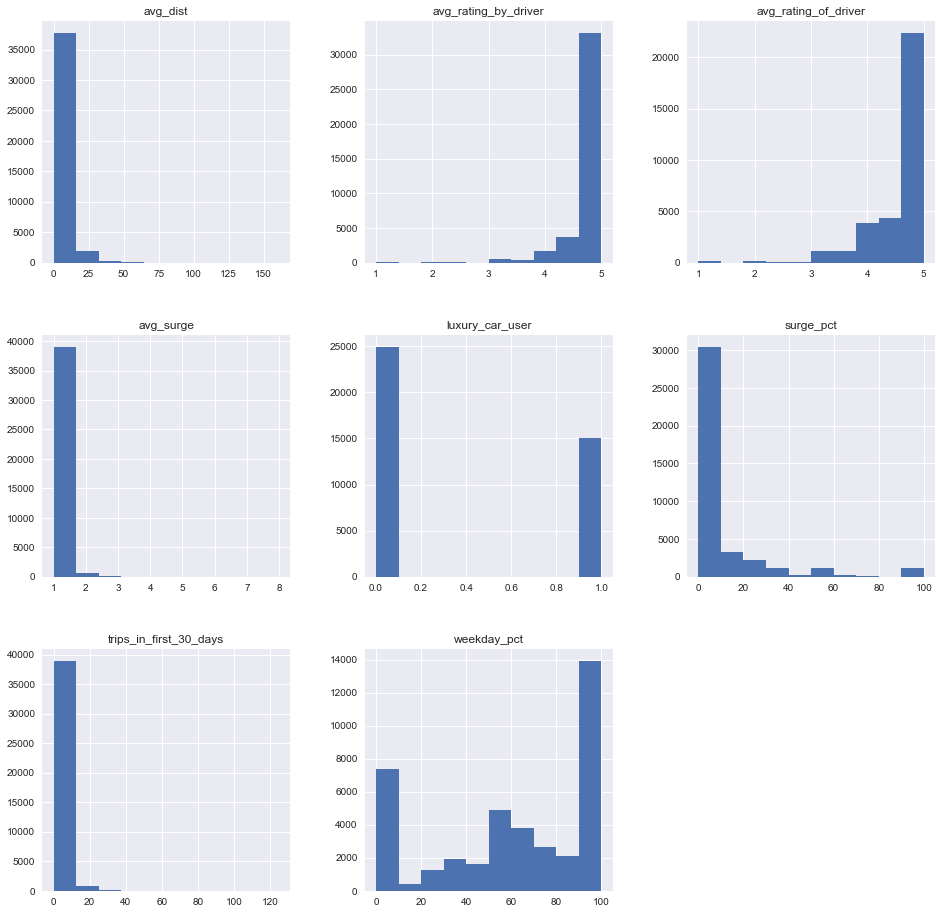

In [35]:
hist_df = fullData.drop(['churn'],axis=1)
hist_df.hist(figsize = (16,16))

In [ ]:
fullData.fillna(fullData.mean())

In [ ]:
print (fullData['last_trip_date'][3] - fullData['signup_date'][3]).days == 1

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'city', u'last_trip_date', u'phone', u'signup_date',
       u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user',
       u'weekday_pct'],
      dtype='object')